### Student Performance indicator

#### steps
###### > understanding the problem statement
###### > Data collection
###### > EDA(Exploratory data analysis)
###### > Data pre-processing 
###### > Model Traning 
###### > choose best model

#### 1) problem statement 

######    > this project understands how the student's performance (test score) is affected by other variables such as gender , ethnicity , parental level of education , lunch and test preparation course.

#### 2) Data collection 
###### > dataset sourece -> .......
###### > this data consists of 8 col and 1000 rows

In [46]:
### importing library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
## import csv file
df = pd.read_csv('data/stud.csv')

In [48]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [50]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [51]:
## missing values
## duplicates
## data tpye
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [52]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [55]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### EDA PART

In [56]:
print(f'Category in gender variable : ',end=" ")
print(df.gender.unique())

print(f'Category in race/ethnicity variable : ',end=" ")
print(df['race/ethnicity'].unique())


print(f'Category in parental level of education  variable : ',end=" ")
print(df['parental level of education'].unique())


print(f'Category in lunch variable : ',end=" ")
print(df['lunch'].unique())

print(f'Category in test preparation course variable : ',end=" ")
print(df['test preparation course'].unique())

Category in gender variable :  ['female' 'male']
Category in race/ethnicity variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Category in parental level of education  variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in lunch variable :  ['standard' 'free/reduced']
Category in test preparation course variable :  ['none' 'completed']


In [57]:
## define numbrical and object feature col

In [58]:
numbrical_fea = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_fea = [feature for feature in df.columns if df[feature].dtype == 'O']

In [59]:
numbrical_fea

['math score', 'reading score', 'writing score']

In [60]:
categorical_fea

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [61]:
## add new columans 

df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [62]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [63]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()
print(f'reading_full : {reading_full} \nwriting_full : {writing_full} \nmath_full : {math_full}')


reading_full : 17 
writing_full : 14 
math_full : 7


In [64]:
reading_20 = df[df['reading score'] <= 20]['average'].count()
writing_20 = df[df['writing score'] <= 20]['average'].count()
math_20 = df[df['math score'] <= 20]['average'].count()
print(f'reading_20 : {reading_20} \nwriting_20 : {writing_20} \nmath_20 : {math_20}')


reading_20 : 1 
writing_20 : 3 
math_20 : 4


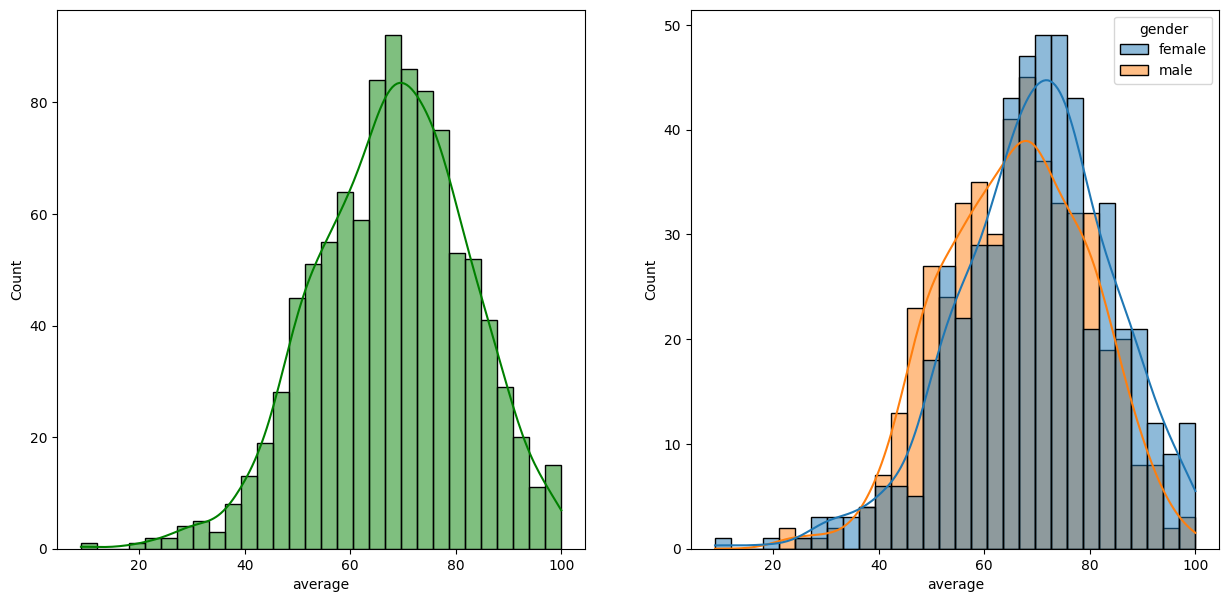

In [70]:
fig , axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True, hue='gender')
plt.show()

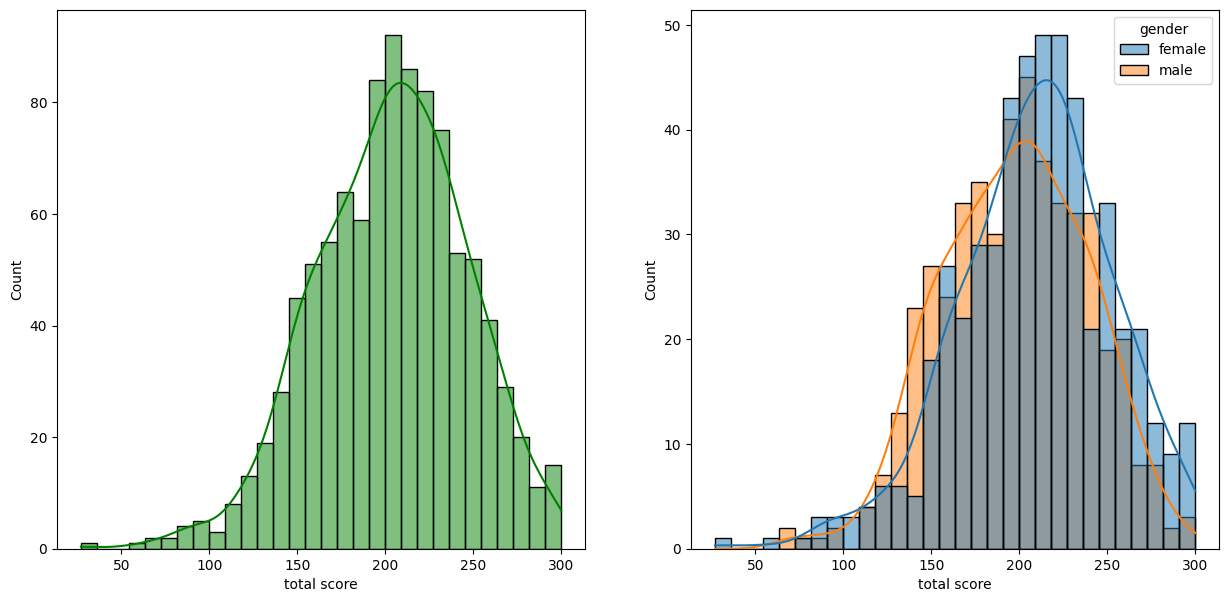

In [72]:
fig , axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,kde=True, hue='gender')
plt.show()

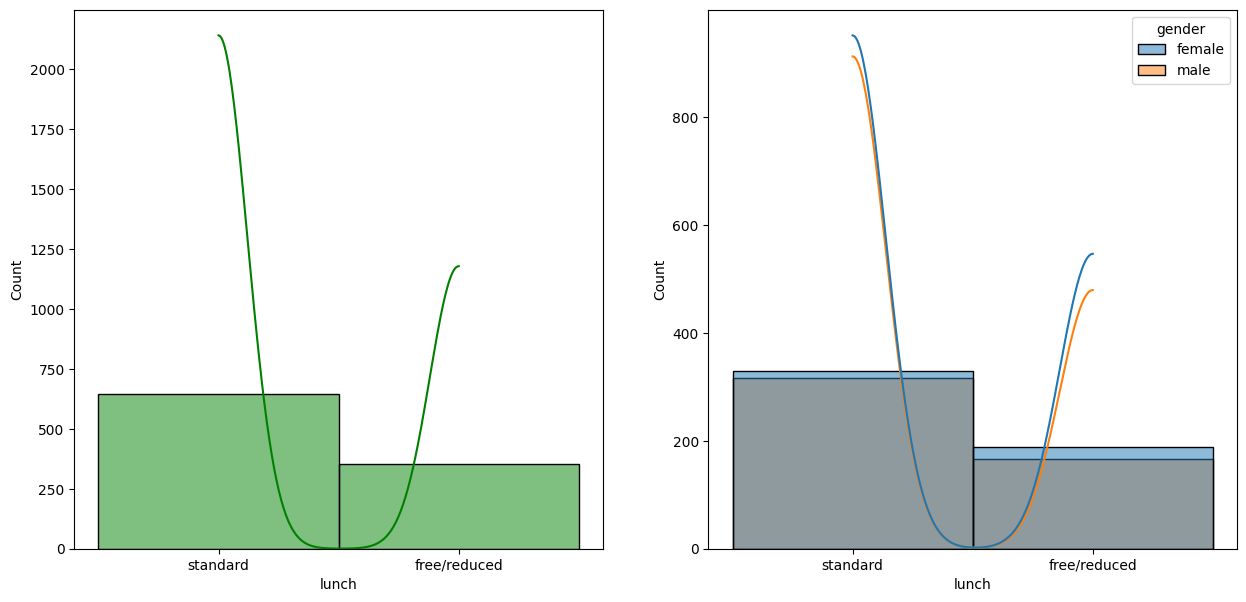

In [73]:
fig , axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='lunch',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='lunch',bins=30,kde=True, hue='gender')
plt.show()